### CLEANING AND ANALYZING THE 'USED CARS' DATASET


In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


#loading the dataset
used_cars_ii = pd.read_csv('used_car_sales.csv')


#checking first few rows (only 5)
print(used_cars_ii.head(5))

       ID  pricesold  yearsold zipcode  Mileage               Make  \
0  137178       7500      2020   786**    84430               Ford   
1   96705      15000      2019   81006        0  Replica/Kit Makes   
2  119660       8750      2020   33449    55000             Jaguar   
3   80773      11600      2019   07852    97200               Ford   
4   64287      44000      2019   07728    40703            Porsche   

                Model  Year           Trim                   Engine  \
0             Mustang  1988             LX              5.0L Gas V8   
1  Jaguar Beck Lister  1958            NaN        383 Fuel injected   
2                 XJS  1995  2+2 Cabriolet  4.0L In-Line 6 Cylinder   
3             Mustang  1968          Stock           289 cu. in. V8   
4                 911  2002     Turbo X-50                     3.6L   

      BodyType  NumCylinders DriveType  
0        Sedan             0       RWD  
1  Convertible             8       RWD  
2  Convertible             6 

In [2]:
#checking columns and column names

print(used_cars_ii.columns)

Index(['ID', 'pricesold', 'yearsold', 'zipcode', 'Mileage', 'Make', 'Model',
       'Year', 'Trim', 'Engine', 'BodyType', 'NumCylinders', 'DriveType'],
      dtype='object')


In [3]:
#getting me insight about what datatypes there are in each column

print(used_cars_ii.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122144 entries, 0 to 122143
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            122144 non-null  int64 
 1   pricesold     122144 non-null  int64 
 2   yearsold      122144 non-null  int64 
 3   zipcode       121235 non-null  object
 4   Mileage       122144 non-null  int64 
 5   Make          122144 non-null  object
 6   Model         121571 non-null  object
 7   Year          122144 non-null  int64 
 8   Trim          73220 non-null   object
 9   Engine        95046 non-null   object
 10  BodyType      101358 non-null  object
 11  NumCylinders  122144 non-null  int64 
 12  DriveType     97293 non-null   object
dtypes: int64(6), object(7)
memory usage: 12.1+ MB
None


In [4]:
#checking the shape of the dataframe

print(used_cars_ii.shape)

(122144, 13)


In [18]:
#checking for duplicates

print(used_cars_ii.duplicated().sum())

0


In [6]:
#checking to see if all rows have unique values

print(used_cars_ii.nunique())

ID              122144
pricesold         4424
yearsold             3
zipcode          15482
Mileage          60843
Make               464
Model             4289
Year               148
Trim             24981
Engine           22399
BodyType          2329
NumCylinders        17
DriveType         2814
dtype: int64


### from the results above, it could be said that some of the columns do not have unique values 
### because the dataset has a 1000 plus different rows and if all rows do not have a 1000 plus 
### unique values, then there might be null values or missing dataset and/or repeated values. 

In [7]:

#checking for NaN/null

print(used_cars_ii.isna().sum())

ID                  0
pricesold           0
yearsold            0
zipcode           909
Mileage             0
Make                0
Model             573
Year                0
Trim            48924
Engine          27098
BodyType        20786
NumCylinders        0
DriveType       24851
dtype: int64


In [8]:
#dropping NaN

print(used_cars_ii.dropna(inplace = True))

None


In [9]:
print(used_cars_ii.isna().sum())

ID              0
pricesold       0
yearsold        0
zipcode         0
Mileage         0
Make            0
Model           0
Year            0
Trim            0
Engine          0
BodyType        0
NumCylinders    0
DriveType       0
dtype: int64


### Per the result above, There are zero NaN in the dataset now. 

In [10]:
print(used_cars_ii)

            ID  pricesold  yearsold zipcode  Mileage     Make          Model  \
0       137178       7500      2020   786**    84430     Ford        Mustang   
2       119660       8750      2020   33449    55000   Jaguar            XJS   
3        80773      11600      2019   07852    97200     Ford        Mustang   
4        64287      44000      2019   07728    40703  Porsche            911   
10      158271      20000      2020   333**    51674     Jeep       Wrangler   
...        ...        ...       ...     ...      ...      ...            ...   
122131   42098       3400      2019   97031   247000   Toyota          Camry   
122133   10511       3500      2019   94952    61413    Dodge  Other Pickups   
122135   87007       6700      2019   95407    76413     Ford         Bronco   
122142   29096       2280      2019   92131   164337      BMW       3-Series   
122143   52391       5000      2019   18951   163111   Nissan          300ZX   

        Year                  Trim     

### Per the results above, the zipcode column still looks messy, 
### we could try and clean it but per the business questions, that column is not needed
### we will go ahead and drop the whole column. 

In [11]:

#dropping the 'zipcode' column

print(used_cars_ii.drop('zipcode', axis = 1, inplace = True))

None


In [12]:
#more exploration of the dataset (the 'year' column)

print(used_cars_ii['Year'].unique())

[    1988     1995     1968     2002     2015     2012     2004     1978
     2009     2006     2003     2016     1957     2010     1987     1992
     1991     1984     1966     1989     1931     1970     1997     1967
     1985     1973     1983     1977     2000     1993     1999     1979
     1971     1956     2011     1952     1937     2001     2007     2005
     1929     2008     1996     1969     2013     1994     1964     1963
     2017     1959     1998     1980     1972     1960     1949     1976
     1932     1975     1947     1940     1958     1965     1934     1936
     1986     1982     2018     2019     2014     1962     1990     1951
     1953     1961     1974     1981     2020     1941     1939     1950
     1946     1955     1954     1920     1930     1948     1926     1928
     1944     1924     1927     1942 20130000        0     1922     1925
 20140000     1935     1923     1921     1917     1885     1933     1900
     1938     1858     1915     1914       99     1

### From the results above, it looks like the 'Year' columns needs 
### some more cleaning.

In [13]:

#converting the year column from int to str for easier cleaning. 
used_cars_ii['Year'] = used_cars_ii['Year'].astype(str)


#removing the years with unnecesarry zeros behind them
used_cars_ii = used_cars_ii[~used_cars_ii['Year'].str.endswith('0000')]


#removing double digit dates and '0' 
to_dropp = ['0', '68', '99']
used_cars_ii.drop(used_cars_ii[used_cars_ii['Year'].isin(to_dropp)].index, inplace= True)


#converting the year column back to int
used_cars_ii['Year'] = used_cars_ii['Year'].astype(int)

#final check
print(used_cars_ii['Year'].unique())


[1988 1995 1968 2002 2015 2012 2004 1978 2009 2006 2003 2016 1957 2010
 1987 1992 1991 1984 1966 1989 1931 1970 1997 1967 1985 1973 1983 1977
 2000 1993 1999 1979 1971 1956 2011 1952 1937 2001 2007 2005 1929 2008
 1996 1969 2013 1994 1964 1963 2017 1959 1998 1980 1972 1960 1949 1976
 1932 1975 1947 1940 1958 1965 1934 1936 1986 1982 2018 2019 2014 1962
 1990 1951 1953 1961 1974 1981 2020 1941 1939 1950 1946 1955 1954 1920
 1930 1948 1926 1928 1944 1924 1927 1942 1922 1925 1935 1923 1921 1917
 1885 1933 1900 1938 1858 1915 1914 1903 1945 1913 1919 1901]


In [14]:
#final look at the clean dataset
print(used_cars_ii.head(15))

        ID  pricesold  yearsold  Mileage           Make     Model  Year  \
0   137178       7500      2020    84430           Ford   Mustang  1988   
2   119660       8750      2020    55000         Jaguar       XJS  1995   
3    80773      11600      2019    97200           Ford   Mustang  1968   
4    64287      44000      2019    40703        Porsche       911  2002   
10  158271      20000      2020    51674           Jeep  Wrangler  2015   
11   72418      14100      2019   109500           Jeep  Wrangler  2012   
16  144540       3330      2020    47692          Buick   LeSabre  2004   
19   59728      18550      2019     6714      Chevrolet    Camaro  2002   
21   74812       4750      2019   151361           Ford     F-250  1978   
22   78263       3050      2020    95600         Nissan    Maxima  2004   
23   78272       4050      2020   100427         Nissan    Altima  2009   
28   77898       3500      2019   144868          Honda      CR-V  2006   
34    8978       4600    



# BUSINESS QUESTIONS

### Question 1: How has the average sale price changed over the years? (2018-2020)?
### Question 2: Is there a correlation between mileage and sale price for specific vehicle types or makes?




# ANSWER FOR QUESTION 1

<function show at 0x000002A3F99235E0>


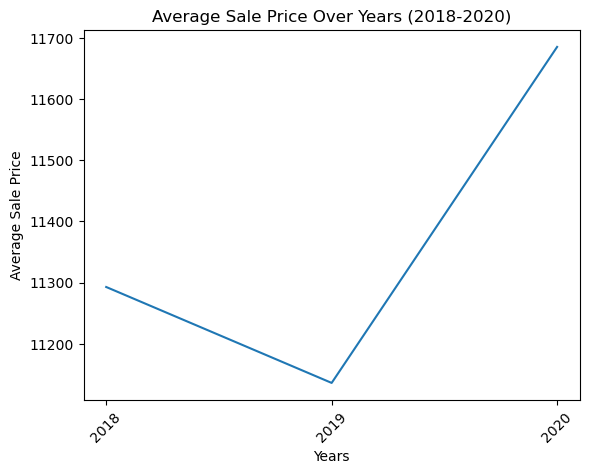

In [15]:
#creating a figure and its associated axis for plotting
fig, ax = plt.subplots()

#grouping by 'year sold'  and calculating the mean sale price for each year
yearly_avg_p = used_cars_ii.groupby('yearsold')['pricesold'].mean()

#plotting the data
plt.plot(yearly_avg_p.index, yearly_avg_p.values)
plt.title('Average Sale Price Over Years (2018-2020)')
plt.xlabel('Years')
plt.ylabel('Average Sale Price')
plt.xticks(yearly_avg_p.index)
plt.xticks(rotation = 45)
print(plt.show)



### According to the chart above, the average sale price has changed in a sense that 
### from 2018 to 2019, it saw a decline and from 2019 to 2020 it increased 




# ANSWER FOR QUESTION 2

In [16]:
#fetching Makes that sold the most (top 4)
top_four_makes = used_cars_ii['Make'].value_counts().head(4)

#Filtering dataset to get only the top four Makes
top_four_filtered = used_cars_ii[used_cars_ii['Make'].isin(top_four_makes.index)]

#top four makes
print(top_four_filtered['Make'].unique())

#final dataset with data from only top four makes
print(top_four_filtered)

['Ford' 'Chevrolet' 'Mercedes-Benz' 'Toyota']
            ID  pricesold  yearsold  Mileage           Make    Model  Year  \
0       137178       7500      2020    84430           Ford  Mustang  1988   
3        80773      11600      2019    97200           Ford  Mustang  1968   
19       59728      18550      2019     6714      Chevrolet   Camaro  2002   
21       74812       4750      2019   151361           Ford    F-250  1978   
34        8978       4600      2019   180000  Mercedes-Benz  S-Class  2003   
...        ...        ...       ...      ...            ...      ...   ...   
122125   11715       8600      2019    54000      Chevrolet   Impala  1958   
122127    8426      27900      2019    80540           Ford    F-250  2002   
122129   39969        200      2019    77195      Chevrolet     S-10  1985   
122131   42098       3400      2019   247000         Toyota    Camry  2002   
122135   87007       6700      2019    76413           Ford   Bronco  1979   

                 




# VISUALIZATION

<function show at 0x000002A3F99235E0>


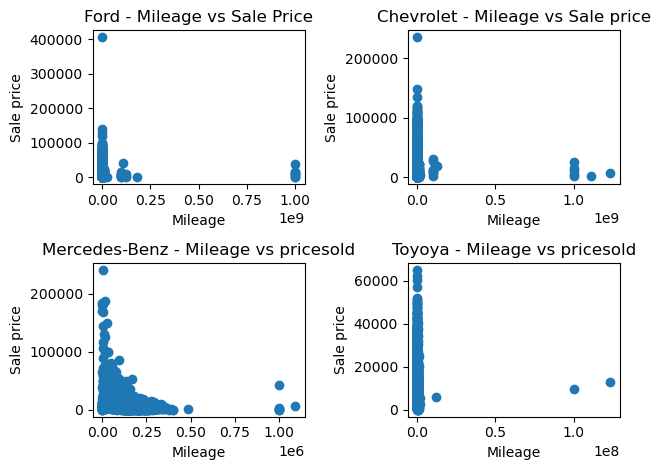

In [17]:
#creating separate scatter plots for each make, using subplots
fig, axes = plt.subplots(2,2)


#filtering and plotting for each Make individually
make_ford = top_four_filtered[top_four_filtered['Make'] == 'Ford']
make_chev = top_four_filtered[top_four_filtered['Make'] == 'Chevrolet']
make_mercedes = top_four_filtered[top_four_filtered['Make'] == 'Mercedes-Benz']
make_toyota = top_four_filtered[top_four_filtered['Make'] == 'Toyota']

axes[0,0].scatter(make_ford['Mileage'], make_ford['pricesold'])
axes[0,0].set_title('Ford - Mileage vs Sale Price')
axes[0,0].set_xlabel('Mileage')
axes[0,0].set_ylabel('Sale price')

axes[0,1].scatter(make_chev['Mileage'], make_chev['pricesold'])
axes[0,1].set_title('Chevrolet - Mileage vs Sale price')
axes[0,1].set_xlabel('Mileage')
axes[0,1].set_ylabel('Sale price')

axes[1,0].scatter(make_mercedes['Mileage'], make_mercedes['pricesold'])
axes[1,0].set_title('Mercedes-Benz - Mileage vs pricesold')
axes[1,0].set_xlabel('Mileage')
axes[1,0].set_ylabel('Sale price')

axes[1,1].scatter(make_toyota['Mileage'], make_toyota['pricesold'])
axes[1,1].set_title('Toyoya - Mileage vs pricesold')
axes[1,1].set_xlabel('Mileage')
axes[1,1].set_ylabel('Sale price')

plt.tight_layout()
print(plt.show)

### According the the scatter plots above, 
### it looks like the higher the mileage of the vehicle, the lower the sale price 
### and the lower the mileage, the higher the sale price. 